In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec
import math
import statsmodels.api as sm
import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from scipy import stats, ndimage, misc
import csv
import opto_util as opto
from matplotlib.ticker import FormatStrFormatter

mpl.style.use('classic')
%matplotlib inline


In [2]:
full_df=pd.read_csv('20210415_full_df.csv')

/Users/travish/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,24,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
intKclusters=pd.read_csv('interneuron_Kclusters_1203.csv')
full_df = pd.merge(full_df, intKclusters,  how='left', left_on=['exp_id','headstage'], right_on = ['experiment','headstage'])
full_df.Kcluster.unique()

array([ 1., nan,  0.,  2.])

In [5]:

standard_df=full_df[full_df.internal=='standard']
standard_df=standard_df[standard_df.notes.isnull()]
print (np.shape(standard_df))

(16286, 85)


In [6]:
RorbAi167=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='Ai167')]
RorbKv=standard_df[(standard_df.presynapticCre=='Rorb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
SstAi167=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='Ai167')]
SstKv=standard_df[(standard_df.presynapticCre=='Sst') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PvalbKv=standard_df[(standard_df.presynapticCre=='Pvalb') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
PenkKv=standard_df[(standard_df.presynapticCre=='Penk') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Tlx3Kv=standard_df[(standard_df.presynapticCre=='Tlx3') & (standard_df.presynapticEffector=='ChrimsonR_kv_eyfp_AAV')]
Scnn1aAi167=standard_df[(standard_df.presynapticCre=='Scnn1a') & (standard_df.presynapticEffector=='Ai167')]
Sst=standard_df[standard_df.presynapticCre=='Sst']
Ntsr1=standard_df[standard_df.presynapticCre=='Ntsr1']
Rorb=standard_df[standard_df.presynapticCre=='Rorb']
Scnn1a=standard_df[standard_df.presynapticCre=='Scnn1a']

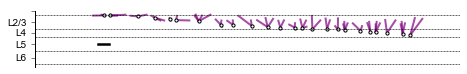

In [7]:
df=PvalbKv
df=df[(df.post_layer==2)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['y_pia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'MP_ID'], sort=False)
x_offset=100
count=0


for name, group in grouped:
    group=group.reset_index()

    cnxs=group[group.cnx=='inhibitory']
    if len(cnxs.index)>1:

        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        pre_pia=np.mean(cnxs.y_pia)
        count+=1

        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.toPia[cnx], pre_pia], lw=2, alpha=0.7, c='purple',zorder=0)
        plt.scatter([x_offset],[pre_pia],marker='o', s=10,c='white',zorder=1)    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([0,215,405,630,890], (' ', 'L2/3', 'L4', 'L5', 'L6'), fontname = "arial")


fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Pvalb_diverge.svg')


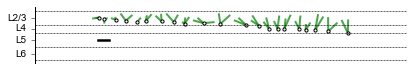

In [8]:
df=Sst
df=df[(df.post_layer==2)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['y_pia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'MP_ID'], sort=False)
x_offset=100
count=0

for name, group in grouped:
    group=group.reset_index()

    cnxs=group[group.cnx=='inhibitory']
    if len(cnxs.index)>1:
        count+=1
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        pre_pia=np.mean(cnxs.y_pia)
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.toPia[cnx], pre_pia], lw=2, alpha=0.7, c='green',zorder=0)
        plt.scatter([x_offset],[pre_pia],marker='o', s=10,c='white',zorder=1)    
    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050
ax.set_aspect(aspect='equal',adjustable='box')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([215,405,630,890], ('L2/3', 'L4', 'L5', 'L6'), fontname = "arial")
ax.yaxis.set_tick_params(direction='out')
fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Sst_diverge.svg')


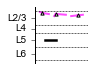

In [9]:
df=PenkKv
df=df[(df.post_layer==2)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['y_pia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'MP_ID'], sort=False)
x_offset=100
count=0

for name, group in grouped:
    group=group.reset_index()
    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:
        count+=1
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        pre_pia=np.mean(cnxs.y_pia)
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.toPia[cnx], pre_pia], lw=2, alpha=0.7, c='magenta',zorder=0)
        plt.scatter([x_offset],[pre_pia],marker='^', s=10,c='white',zorder=1)    
    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([215,405,630,890], ('L2/3', 'L4', 'L5', 'L6'), fontname = "arial")
ax.yaxis.set_tick_params(direction='out')
fig.set_figheight(1)
fig.set_figwidth(width_fact)

#plt.savefig('Penk_diverge.svg')


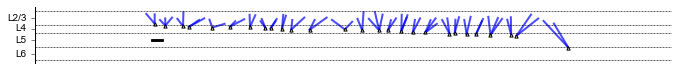

In [10]:

df=Rorb
df=df[(df.post_layer==2)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['y_pia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'MP_ID'], sort=False)
x_offset=100
count=0
for name, group in grouped:
    group=group.reset_index()
    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:
        count+=1
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        pre_pia=np.mean(cnxs.y_pia)
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.toPia[cnx], pre_pia], lw=2, alpha=0.7, c='blue',zorder=0)
        plt.scatter([x_offset],[pre_pia],marker='^', s=10,c='white',zorder=1)    
   
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            

plt.ylim([1050,0])

x_lims=ax.get_xlim()

opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([215,405,630,890], ('L2/3', 'L4', 'L5', 'L6'), fontname = "arial")
plt.plot([200,400], [630,630], c='black', lw=2.5)
ax.yaxis.set_tick_params(direction='out')

fig.set_figheight(1)
fig.set_figwidth(width_fact)


#plt.savefig('Rorb_diverge.svg')


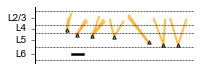

In [11]:
df=Tlx3Kv
df=df[(df.post_layer==2)]
df=df.dropna(subset=['y_pia','toPia'])
df=df.sort_values(by=['y_pia'])
fig, ax = plt.subplots()
grouped=df.groupby(['exp_id', 'MP_ID'], sort=False)
x_offset=100
count=0

for name, group in grouped:
    group=group.reset_index()

    cnxs=group[group.cnx=='excitatory']
    if len(cnxs.index)>1:
        count+=1
        min_x=min(cnxs.x_ap)
        max_x=max(cnxs.x_ap)
        pre_pia=np.mean(cnxs.y_pia)
        if min_x<0:
            x_offset+=abs(min_x)
        for cnx in cnxs.index:
            plt.plot([cnxs.x_ap[cnx]+x_offset, x_offset], [cnxs.toPia[cnx], pre_pia], lw=2, alpha=0.7, c='orange',zorder=0)
        plt.scatter([x_offset],[pre_pia],marker='^', s=10,c='white',zorder=1)    
    
        if max_x>0:
            x_offset=x_offset+100+max_x
        else:
            x_offset=x_offset+100
            
        
plt.ylim([1050,0])
x_lims=ax.get_xlim()
opto.layer_borders(ax, max_x=x_lims[1],lw=1,alpha=0.6, ls=(0,(2,1)))
plt.plot([200,400], [880,880], c='black', lw=2.5)
ax.set_xlim(x_lims)
width_fact=(x_lims[1]-x_lims[0])/1050

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.yaxis.set_ticks_position('left')
ax.yaxis.set_tick_params(direction='out')
ax.xaxis.set_ticks_position('none')
plt.xticks([])
plt.yticks([215,405,630,890], ('L2/3', 'L4', 'L5', 'L6'), fontname = "arial")
fig.set_figheight(1)
fig.set_figwidth(width_fact)
#plt.savefig('Tlx3_diverge.svg')
